나이브 베이즈(naive bayes)는 확률 기반 머신러닝 분류 알고리즘이다.  
나이브 베이즈 분류 알고리즘은 데이터를 나이브(단순)하고 독립적인 사건으로 가정하고 이 독립 사건들을 베이즈 이론(https://angeloyeo.github.io/2020/01/09/Bayes_rule.html) 에 대입시켜 가장 높은 확률의 레이블로 분류를 실행하는 알고리즘이다.  
***
가우시안 나이브 베이즈(Gaussian Naive Bayes) 분류
특징들의 값들이 정규 분포(가우시안 분포)돼 있다는 가정하에 조건부 확률을 계산하며 연속적인 성질이 있는 특성이 있는 데이터를 분류하는데 적합하다.
***
베르누이 나이브 베이즈(Bernoulli Naive Bayes) 분류
데이터의 특징이 0 또는 1로 표현됐을 때 데이터의 출현 여부에 따라서 0 또는 1로 구분되는 데이터에 사용한다.
***
다항 분포 나이브 베이즈(Multinomial Naive Bayes) 분류
데이터의 특징이 출현 횟수로 표현됐을 때 데이터의 출현 횟수에 따라 값을 달리한 데이터에 사용한다.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sklearn

가우시안 나이브 베이즈를 활용한 붓꽃 분류  
iris 데이터를 활용해 데이터의 특징에 따라 붓꽃의 종류를 구분한다.

In [104]:
# 사이킷런에서 제공하는 iris 데이터를 불러오기 위해서 import 한다.
from sklearn.datasets import load_iris
# 학습 데이터와 테스트 데이터를 손쉽게 나눌 수 있도록 import 한다.
from sklearn.model_selection import train_test_split
# 가우시안 나이브 베이즈로 iris 데이터를 분류하기 위해 import 한다.
from sklearn.naive_bayes import GaussianNB
# 분류 성능을 측정하기 위해 사이킷런의 metrics 모듈의 accuracy_score, classification_report를 import 한다.
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [18]:
# iris 데이터 셋을 불러온다.
dataset = load_iris()
# print(type(dataset)) # sklearn.utils.Bunch
# print(dataset.feature_names) # 열 이름
# 'sepal length (cm)' => 꽃 받침 길이, 'sepal width (cm)' => 꽃 받침 너비, 'petal length (cm)' => 꽃잎 길이, 
# 'petal width (cm)' => 꽃잎 너비
# print(dataset.data) # 데이터
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# print(dataset.target) # 실제값, 0 => 'setosa', 1 => 'versicolor', 2 => 'virginica'
df['target'] = dataset.target
df.target = df.target.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
# print(type(df))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


데이터 시각화

In [19]:
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']

꽃 받침 길이

<AxesSubplot:label='7c4da28c-cf85-45da-b77a-4f85ad551c0f'>

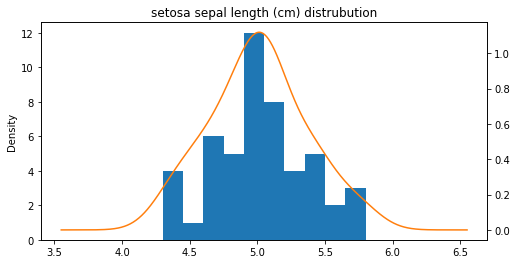

In [26]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title='setosa sepal length (cm) distrubution', 
                                    figsize=[8, 4])

꽃 받침 너비

<AxesSubplot:label='532e2c24-4336-4397-9be1-f9994c383ba2'>

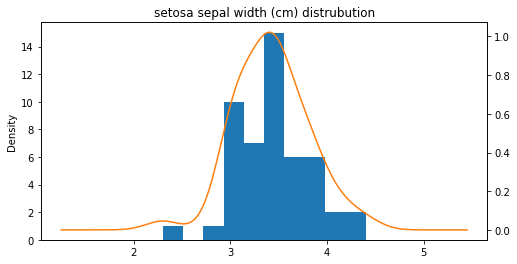

In [27]:
ax = setosa_df['sepal width (cm)'].plot(kind='hist')
setosa_df['sepal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title='setosa sepal width (cm) distrubution', 
                                    figsize=[8, 4])

꽃잎 길이

<AxesSubplot:label='e6906f89-fd8e-4653-8523-68bdc1ca5ba7'>

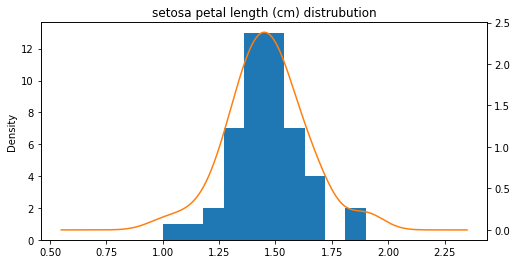

In [28]:
ax = setosa_df['petal length (cm)'].plot(kind='hist')
setosa_df['petal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title='setosa petal length (cm) distrubution', 
                                    figsize=[8, 4])

꽃잎 너비

<AxesSubplot:label='814eba03-378b-41d4-876c-5f5ba9ad3e8b'>

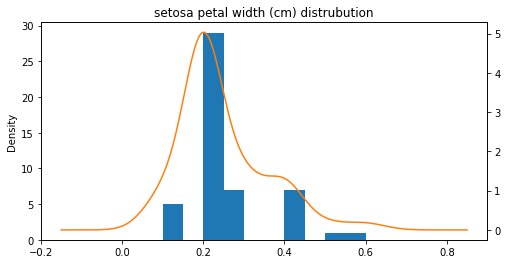

In [29]:
ax = setosa_df['petal width (cm)'].plot(kind='hist')
setosa_df['petal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title='setosa petal width (cm) distrubution', 
                                    figsize=[8, 4])

데이터 다듬기

In [102]:
# 전체 데이터를 80%는 학습에 사용하고 나머지 20%는 테스트에 사용한다.
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, train_size=0.8, test_size=0.2)
print('x_train: {}, x_test: {}'.format(len(x_train), len(x_test)))
print('y_train: {}, y_test: {}'.format(len(y_train), len(y_test)))
print('꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비(문제): {}, 품종(답): {}'.format(x_train[0], y_train[0]))

x_train: 120, x_test: 30
y_train: 120, y_test: 30
꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비(문제): [7.4 2.8 6.1 1.9], 품종(답): 2


가우시안 나이브 베이즈 모델 학습

In [103]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

테스트

In [106]:
predict = model.predict(x_test) # 학습 결과에 따른 테스트 데이터의 예측값을 계산한다.
print(classification_report(y_test, predict)) # 테스트 데이터의 실제값, 예측값
# accuracy: 정확도, precision: 정밀도, recall: 재현율, f1-score: f1 점수

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [107]:
print('정확도(accuracy): {}'.format(accuracy_score(y_test, predict))) # # 테스트 데이터의 실제값, 예측값

정확도(accuracy): 0.9666666666666667


In [108]:
comparsion = pd.DataFrame({'실제값': y_test, '예측값': predict})
comparsion

,실제값,예측값
0,0,0
1,1,1
2,0,0
3,0,0
4,2,2
5,1,1
6,2,2
7,2,2
8,0,0
9,0,0
